# Datasets


author: steeve.laquitaine@epfl.ch  
date: 2023.10.09
last modified: 2023.10.09  
status:  OK
display-status: up-to-date  
regression: None  


## Setup

create and activate env from `npx_10m_384ch_unit_classes.txt`

In [124]:
# listen to changes
%load_ext autoreload
%autoreload 2

import os
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np 

# set project path
PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/sfn_2023/"

os.chdir(PROJ_PATH)

from src.nodes.utils import get_config
from src.nodes.load import load_campaign_params
from src.nodes.dataeng.silico import recording, probe_wiring
from src.nodes.prepro import preprocess
from src.nodes.truth.silico import ground_truth
from src.nodes.dataeng.lfp_only import stacking

# SETUP PARAMETERS
EXPERIMENT = "silico_neuropixels"   # specifies the experiment 
SIMULATION_DATE = "2023_10_01"      # specifies the run (date)
GAIN = 1e5

data_conf, param_conf = get_config(EXPERIMENT, SIMULATION_DATE).values()

# PATHS
RAW_DATASET = data_conf["dataeng"]["campaign"]["output"]["trace_file_path"]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2023-10-11 13:59:00,342 - root - utils.py - get_config - INFO - Reading experiment config.
2023-10-11 13:59:00,374 - root - utils.py - get_config - INFO - Reading experiment config. - done


### Raw traces

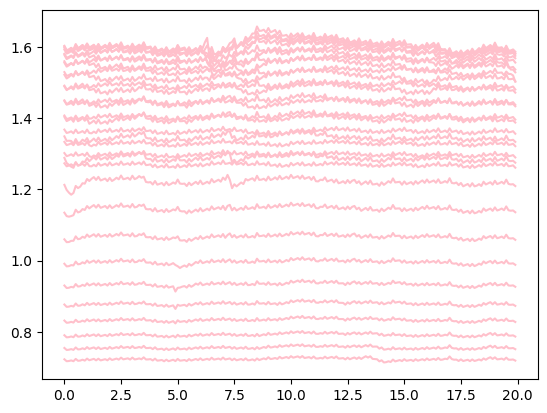

In [121]:
DURATION = 20 # in ms
Y_STEP = 0.0000001

# get traces
raw_traces = pd.read_pickle(RAW_DATASET)
n_contacts = raw_traces.shape[1]

# plot
fig, ax = plt.subplots(1,1)
pos_up = 0
for contact_i in np.arange(0,n_contacts,1):
    pos_up += Y_STEP
    ax.plot(raw_traces.loc[raw_traces.index<DURATION, contact_i] + pos_up, color="pink");

### Rescaled traces (gain and offset)

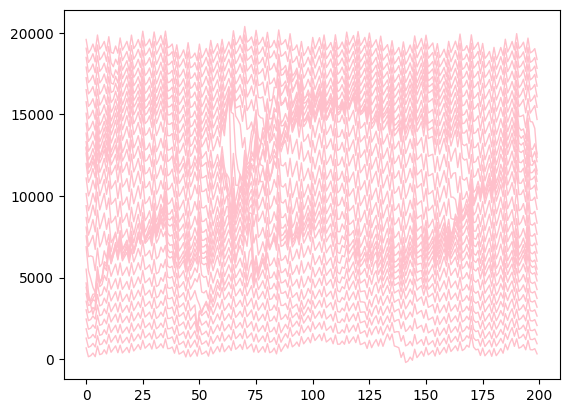

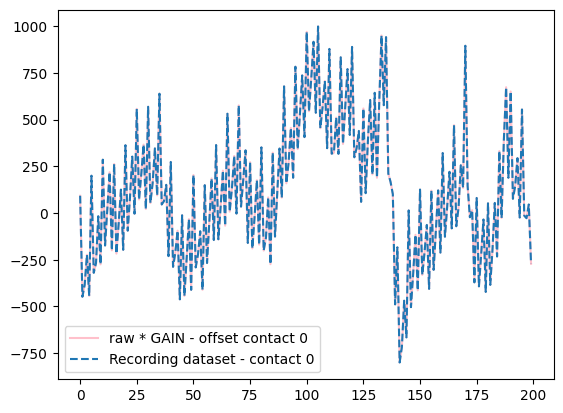

In [125]:
Y_STEP = 600

# get rescaled traces
Recording = recording.load(data_conf);
resc_traces = Recording.get_traces();

# get 20 ms (like Trautmann et al 2023)
sampfreq = 10000    # hz
duration = 20       # in ms
n_timepoints = int(duration*sampfreq/1000)

# plot
fig, ax = plt.subplots(1,1)
pos_up = 0
for contact_i in np.arange(0,n_contacts,1):
    pos_up += Y_STEP
    ax.plot(resc_traces[:n_timepoints, contact_i] + pos_up, color="pink", linewidth=1);

# check rescaling correct
rescaled = raw_traces.loc[:, 0]*GAIN
resc_offsetted = rescaled - np.mean(rescaled)

# plot
fig, ax = plt.subplots(1,1);
plt.plot(resc_offsetted.values[:n_timepoints], color="pink", label="raw * GAIN - offset contact 0");
plt.plot(resc_traces[:n_timepoints, 0], "--", label="Recording dataset - contact 0");

plt.legend();

### Preprocessed traces

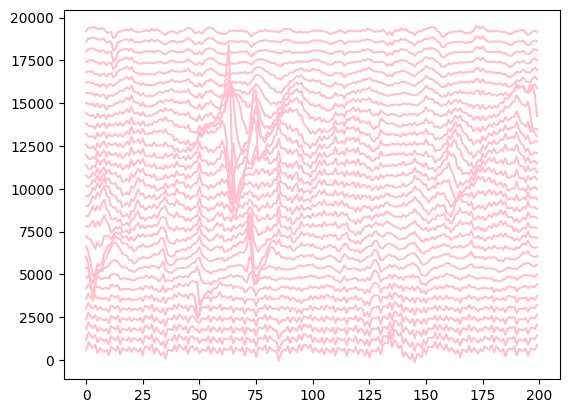

In [126]:
Y_STEP = 600

# get preprocessed
Recording = preprocess.load(data_conf)
traces = Recording.get_traces()

# plot
fig, ax = plt.subplots(1,1)
pos_up = 0
for contact_i in np.arange(0,n_contacts,1):
    pos_up += Y_STEP
    ax.plot(traces[:n_timepoints, contact_i] + pos_up, color="pink");